## Previsão de preços BTC

In [1]:
# Importação de bibliotecas 

#Básicas
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt

# Modelos estatísticos 
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA

#Incremento de data em intervalo definido
from pandas.tseries.offsets import DateOffset

#Plots gráficos
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px

#Avisos
import warnings
warnings.filterwarnings('ignore') #Desativando 'impressão' de avisos


In [2]:
#Importação do DataSet
dados = pd.read_csv("Data\Bitcoin.csv")

- Visualização Inicial dos Dados

In [3]:
dados.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
dados.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,2683.0,1.098990e+04,1.590262e+04,1.768970e+02,6.017780e+02,6.235030e+03,1.031664e+04,6.754973e+04
High,2683.0,1.128663e+04,1.633195e+04,2.117310e+02,6.067070e+02,6.371550e+03,1.049561e+04,6.878962e+04
Low,2683.0,1.066296e+04,1.540807e+04,1.715100e+02,5.960480e+02,6.093670e+03,1.006754e+04,6.638206e+04
Close,2683.0,1.100358e+04,1.590816e+04,1.781030e+02,6.027335e+02,6.238050e+03,1.031794e+04,6.756683e+04
Adj Close,2683.0,1.100358e+04,1.590816e+04,1.781030e+02,6.027335e+02,6.238050e+03,1.031794e+04,6.756683e+04
Volume,2683.0,1.459304e+10,2.008458e+10,5.914570e+06,7.839140e+07,4.999240e+09,2.445092e+10,3.509679e+11


- Limpeza dos Dados

In [5]:
# Inserindo no novo Dataframe apenas colunas selecionadas
df = dados.iloc[:,[0,-2]]
#Renomeando colunas
df.columns = ['Date', 'Price']
#Convertendo coluna date para tipo time
df.loc[:, 'Date'] = pd.to_datetime(df['Date'])
#definindo coluna 'Date' como index
df.set_index('Date', inplace=True)
#Criando cópia do DF por segurança ***(Quando deep=True, as alterações na cópia não serão refletidas no original)
df_seg = df.copy(deep=True)

display(df.head(10))

print('\n\033[1mInfo: \033[0m Dataset contém {} amostras'.format(df.shape[0]))


,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
2014-09-22,402.152008
2014-09-23,435.790985
2014-09-24,423.204987
2014-09-25,411.574005



Info:  Dataset contém 2683 amostras


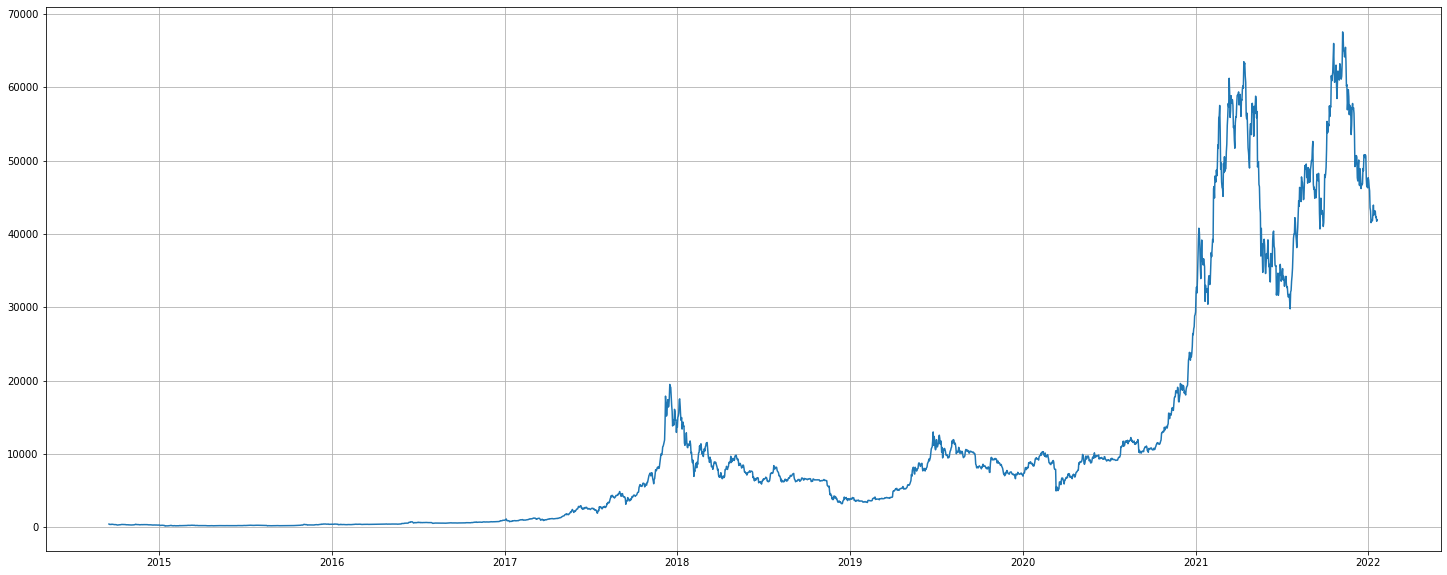

In [26]:
plt.figure(figsize=(25,10))
plt.plot(df)
plt.grid()
plt.show()

In [7]:
fig = px.area(df, title ="Variação de preço 2015 até 2022", labels=dict( Date="Data", value="Preço ($)", variable="Legenda"))
fig.show()